# Explorative Data Analsyses


The purpose of this EDA is to find at least 3 insights about the overall-data and 3 recommendations to a Fake-Stakeholder . 

Notification:
This is the very first data analysis I do on my own and I make a few unproven assumption to fulfil the requirements of the stakeholder.

## Dataset 
This dataset contains information about home sales in King County (USA).

## The Stakeholder 

The Stakeholder is a Buyer, who looks for an object in the real estate industry of King County (USA). The Requirements are:
- Lively
- central neighborhood 
- middle price range
- right timing (within a year)


#### Preparation
For the preparations lets first import the necessary libraries and load the files needed for the EDA and load the the data to a pandas Dataframe.

In [16]:
# Import libraries
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt
# Spatial Plotting
import plotly.graph_objects as go
import plotly.express as px


In [3]:
# Load Dataset
df = pd.read_csv('/Users/felixbehrendt/neuefische/EDA_project/data/King_County_House_prices_dataset.csv')

# get Size of Dataframe
print(df.shape)

# display Dataframe and check Import
df.head(10)


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Based on these to tables we already get a grasp idea of our dataset. The dataset contains 21597 entries and 20 features (excluding the id). Most of the data are numeric and the date column is not from the Date datatype. Some columns (waterfront, view and yr_renovated) have missing values. None of these features are relevant for our stakeholder or the upcoming insights. So we drop these columns.

In [5]:
# Change str-date column to date
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

# Drop Columns - 'yr_renovated', 'waterfront', 'view']
df_subset = df.drop(['yr_renovated', 'waterfront', 'view'], axis = 1)

### Insight 1: Real Estate Industry Activity

For the stakeholder, the timing of the purchase is relevant factor. Under the 'right timing' I assume it refers to the activity of the real estate market. This raises the following questions for the data set:

<b>Is there a periodic variation in activity of the real estate market? If so, which months show high activity ?</b>

Lets have a look in the distribution of the date column:

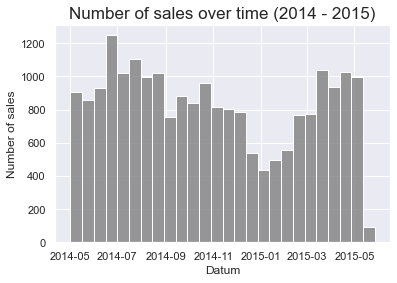

In [6]:
# Change theme of plots
sns.set_theme(style='darkgrid')

# plot histogram for column date
Histplot_date = sns.histplot(
    df_subset.date,
    color='grey',
    kde = False,
    stat ='count',
    alpha=0.8
)
# set title
plt.title('Number of sales over time (2014 - 2015)', fontsize=17)
# set x-label
plt.xlabel('Datum')
# set y-label
plt.ylabel('Number of sales')

plt.show()


Chart description: 
<font color='crimson'>

In the graph it can be seen that many houses are sold in the summer months of 2014, these then decrease to January 2015 and then increase again. 
This is indicative of a periodic pattern for activity of the real estate market. The month 2015/5 is an outlier. The data recording probably stopped in this month. 
</font>

Note: The data cover only a single year...so it is an assumption.

</br>
To represent a periodic behavior and the month with the highest activity, a grouping of all sales per month is suitable. The last month of 2015 will be discarded 
to avoid an overlap of the Mai 2015 and Mai 2014 und creating a bias. 


,month,year,Number of sales
0,1,2015,978
1,2,2015,1247
2,3,2015,1875
3,4,2015,2229
4,5,2014,1768
5,6,2014,2178
6,7,2014,2211
7,8,2014,1939
8,9,2014,1771
9,10,2014,1876


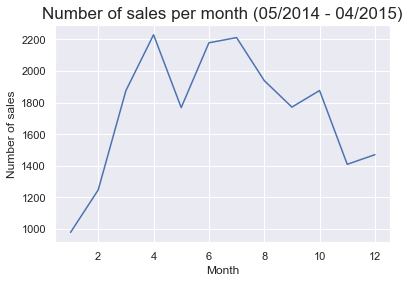

In [14]:
# Create new column for year / month
df_subset['year'] = df_subset.date.dt.year
df_subset['month'] = df_subset.date.dt.month

# Delete all of Mai 2015
df_sub_wo_Mai_2015 = res = df_subset[~(df_subset['date'] >= '2015-05-01')]

# group by month and year
df_count_month = df_sub_wo_Mai_2015.groupby(['month', 'year']).size().to_frame('Number of sales').reset_index()

# Plot
sns.lineplot(
    data =df_count_month,
    x = 'month',
    y = 'Number of sales',
)
# set title
plt.title('Number of sales per month (05/2014 - 04/2015)', fontsize=17)
# set x-label
plt.xlabel('Month')
# set y-label
plt.ylabel('Number of sales')

# # Display Table
df_count_month

Chart description: 
<font color='crimson'>
During the sommer season the number of sales increase. The highest number of sales are in April, June and July (>2000 sales). During Mai the number of sales decrease, which is unexpected. I couldn't find an explanation in the news during the period. 
</font>


#### Conclusion - Insight 1: Real Estate Activity 

Based on the data, I reach the following conclusions:

<b>Real estate market activity fluctuates throughout the year. 
</br>
More properties are sold in the summer months than in the winter months. From this I assume that the number of properties on offer is also higher.  </b>

The months with the highest activity are:
<b>
- April
- June
- July</b>

</br>
</br>


### Insight 2: Central Neighbourhood

The stakeholder wishes for an object in a central neighbourhood. American cities often follow a pattern of structuring that in the core is the CBD(Central Business District), then transitional area and outside the suburbs (for more information see the [wikipedia entry](https://de.wikipedia.org/wiki/Nordamerikanische_Stadt)). In general the real estate object are smaller (area) and more expensive. Therefore I arrive at the following hypothesis:

<b> The closer an object is to the city center, the smaller the size. </b>

<b> The closer an object is to the city center, the higher the price. </b>

Since there is no information about a city center, we now use the given coordinates to display a map with the two indicators size and cost. But at first a glance to the price distribution will be helpful.

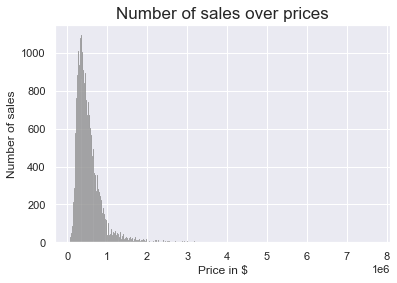

In [123]:
# plot histogram for column date
Histplot_price = sns.histplot(
    df_subset.price,
    color='grey',
    kde = False,
    stat ='count',
    alpha=0.8
)
# set title
plt.title('Number of sales over prices', fontsize=17)
# set x-label
plt.xlabel('Price in $')
# set y-label
plt.ylabel('Number of sales')
# Quantil lines - optional
# plt.axvline(df_subset.price.quantile(0.25), 0,1, linestyle='--')
# plt.axvline(df_subset.price.quantile(0.5), 0,1,linestyle='--')
# plt.axvline(df_subset.price.quantile(0.75), 0,1, linestyle='--')
plt.show()


Chart description: 

<font color='crimson'>
The distribution of the price is unimodal and skewed to the right (positively). The reason for this are a few objects that are very expensive. The majority of the objects are in a price range from $78.000,00 to $645.000,00 (75% of the data). </font>


This skewed distribution causes visual problems when displaying the price. In addition, the stakeholder calls for proposals in the middle price range. Therefore it is advisable to group the costs into intervals. Here, the 25%, 50% and the 75% quantile are used to group the prices into four intervals:

| Price Interval     | Price Range in $ |
| ----------- | ----------- |
| low prices       | (77999.999, 322000.0]      |
| middle prices   | (322000.0, 450000.0]       |
| high prices   | (450000.0, 645000.0]       |
| very high prices   | (645000.0, 7700000.0]       |

In [118]:
# create new column with group of prices
df_subset['price_ranges'] = pd.qcut(df_subset.price, q = 4, labels=['low', 'middle', 'high', 'very high'])

Here the Geoplot:

In [138]:
# create inverse for better visualization
df_subset['inverse sqft_lot'] = 1 / df_subset.sqft_lot


# create a map of area, where houses from data set located
fig = px.scatter_mapbox(df_subset.sample(2000).sort_values('price_ranges'), #our data set but sampled to 2000 entries and ordered by price range
                        lat="lat", lon="long", #location
                        size="inverse sqft_lot", #select a column for ranking
                        hover_name="id", # see id
                        hover_data=["price", "sqft_lot"], # display price and size
                        color = 'price_ranges', # set color depending on type of price

                        size_max=15, 
                        color_discrete_sequence=px.colors.qualitative.T10,  # change colour of sequence for visualisation
                        zoom=8, # set zoom
                        width=900, height=600, #map size
                        title =  'Map of sold real estate objects in King County', # add title
                        mapbox_style='open-street-map' # set background map to open street
                        ) 
#style of map

# Update legend title and position
fig.update_layout(legend=dict(
    title='Price Ranges',
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

# Add information about size correlation to the map
fig.add_annotation(text="The size of the marker decrease with the size of the object!",
                  xref="paper", yref="paper",
                  x=0.01, y=0.01, showarrow=False)

# Display plot
fig.show(config={'scrollZoom': False})


Map description: 

<font color='crimson'>
The distribution of the price is unimodal and skewed to the right (positively). The reason for this are a few objects that are very expensive. The majority of the objects are in a price range from $78,000 to $645.,000 (75% of the data). </font>

#### Conclusion - Insight 2: Central Neighbourhood

Based on the data, I reach the following conclusions:

<b> The closer an object is to the city center, the smaller the size. </b>

<b> The closer an object is to the city center, the higher the price. </b>
</br>
More properties are sold in the summer months than in the winter months. From this I assume that the number of properties on offer is also higher.  </b>

The months with the highest activity are:
<b>
- April
- June
- July</b>

</br>
</br>